<a href="https://colab.research.google.com/github/shubin023/generative_ai/blob/main/AI_masters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework3: Variational inference and VAE

## Task 1: Theory (4pt)

### Problem 1: IWAE theory (1.5pt)

Variational inference is based on the ELBO objective:
$$
    \mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta})  = \mathbb{E}_{\mathbf{z} \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi})} \right) \rightarrow \max_{\boldsymbol{\phi}, \boldsymbol{\theta}}.
$$
ELBO is a lower bound of the log-likelihood. However if the gap between ELBO and log-likelihood is large, then our model is not optimal. In this task we discuss the way, how to improve the lower bound.

The improvement was introduced in the [IWAE](https://arxiv.org/abs/1509.00519) model. This model introduces the improved version of the variational lower bound (ELBO):

$$
    \mathcal{L}_K (\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log \left( \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x}, \boldsymbol{\phi})} \right) \rightarrow \max_{\boldsymbol{\phi}, \boldsymbol{\theta}}.
$$

Note, that the difference with the original ELBO is the sum over $K$ different latent vectors $\mathbf{z}_k$.

Moreover we can rewrite ELBO in the following form:

$$
    \mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta}) = \frac{1}{K} \sum_{k=1}^K\mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta}) = \frac{1}{K} \sum_{k=1}^K \mathbb{E}_{\mathbf{z}_k \sim q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log \left( \frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x}, \boldsymbol{\phi})} \right) = \frac{1}{K}  \mathbb{E}_{\mathbf{z}_k \sim q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \sum_{k=1}^K \log \left( \frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x}, \boldsymbol{\phi})} \right).
$$
Here we see that the only difference between these two objectives ($\mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta})$ and $\mathcal{L}_K (\boldsymbol{\phi}, \boldsymbol{\theta})$) is the order of sum and logarithm.

Our task here is two proof that the objective $\mathcal{L}_K (\boldsymbol{\phi}, \boldsymbol{\theta})$ is also a lower bound of log-likelihood and this lower bound is better than the initial ELBO.

We have to prove the following facts:

1. $\log p(\mathbf{x} | \boldsymbol{\theta}) \geq \mathcal{L}_K (\boldsymbol{\phi}, \boldsymbol{\theta}) \geq \mathcal{L}_M (\boldsymbol{\phi}, \boldsymbol{\theta}), \quad \text{for } K \geq M$;
2.  $\log p(\mathbf{x} | \boldsymbol{\theta}) = \lim_{K \rightarrow \infty} \mathcal{L}_K (\boldsymbol{\phi}, \boldsymbol{\theta})$ if $\frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})}$ is bounded.

**Hints:**
1. First part of the theorem.

    (a) Use the following equation inside the logarithm of $\mathcal{L}_K (q, \boldsymbol{\theta})$
$$
    \frac{a_1 + \dots + a_K}{K} = \mathbb{E}_{k_1, \dots, k_M} \frac{a_{k_1} + \dots + a_{k_M}}{M}, \quad k_1, \dots, k_M \sim U[1, K]
$$
    (b) Apply Jensen' inequality.
3. Second part of the theorem: use the Law of large numbers.


```
your solution
```

### Problem 1: ELBO surgery (1pt)

At the lecture 6 we proved the [ELBO surgery](http://approximateinference.org/accepted/HoffmanJohnson2016.pdf) theorem:
$$
    \frac{1}{n} \sum_{i=1}^n KL(q(\mathbf{z} | \mathbf{x}_i) || p(\mathbf{z})) = KL(q_{\text{agg}}(\mathbf{z}) || p(\mathbf{z})) + \mathbb{I}_{q} [\mathbf{x}, \mathbf{z}],
$$
where the first term is $KL(q_{\text{agg}}(\mathbf{z}) || p(\mathbf{z}))$ includes the aggregated posterior distribution $q_{\text{agg}}(\mathbf{z})$ and the prior distribution $p(\mathbf{z})$. Our goal now is to deal with the second term. At the lecture, the second term was equal to:

$$
    \mathbb{I}_{q} [\mathbf{x}, \mathbf{z}] = \frac{1}{n}\sum_{i=1}^n KL(q(\mathbf{z} | \mathbf{x}_i) || q_{\text{agg}}(\mathbf{z})).
$$
In fact, this is a mutual information between $\mathbf{x}$ and $\mathbf{z}$ on the empirical distribution of data and the distribution of $q(\mathbf{z} | \mathbf{x})$. Let treat the index of the sample $i$ as a random variable.
$$
    q(i, \mathbf{z}) = q(i) q(\mathbf{z} | i); \quad p(i, \mathbf{z}) = p(i) p(\mathbf{z}); \quad
    q(i) = p(i) = \frac{1}{n}.
$$
$$
    \quad q(\mathbf{z} | i) = q(\mathbf{z} | \mathbf{x}_i) \quad q_{\text{agg}}(\mathbf{z}) = \sum_{i=1}^n q(i, \mathbf{z}) = \frac{1}{n} \sum_{i=1}^n q(\mathbf{z} | \mathbf{x}_i);  
$$
Mutual information is a measure of independence between two random variables.
$$
	\mathbb{I}_{q} [\mathbf{x}, \mathbf{z}] = \mathbb{E}_{q(i, \mathbf{z})} \log \frac{q(i, \mathbf{z})}{q(i)q_{\text{agg}}(\mathbf{z})}.
$$
Prove that 2 expressions for mutual information are equal to each other.

```
your solution
```

### Problem 3: Gumbel-Max trick (1.5pt)

In this problem you have to prove the Gumbel-Max trick that we have discussed at the Lecture 6.

Let $\pi_1, \pi_2, \dots \pi_K, \in (0, 1)$ and $\sum\limits_{k = 1}^{K} \pi_k = 1$. Consider the discrete random variable:

$$
  c = \arg\max_{k} \left[\log \pi_k + g_k\right].
$$

In the formula above $g_k$ ($k \in \{1, \dots K\}$) are independent random variables distributed following the $\text{Gumbel}(0, 1)$ distribution ([wiki](https://en.wikipedia.org/wiki/Gumbel_distribution)), i.e. $g_k \sim \text{Gumbel}(0, 1)$.

Note that $g_k = - \log (- \log u)$, where $u \sim \text{Uniform}[0, 1]$.

Our goal is to prove that $c \sim \text{Categorical}(\pi_1, \dots \pi_K)$.

1. Find cumulative distribution function ($F_{g}(x) = P(g < x)$) of Gumbel distribution.

2. Find density of the Gumbel distribution (derivative of cdf).

3. Consider random variables $\zeta_k = \log \pi_k + g_k$. Let's fix $k^* \in \{1, \dots K\}$ and look at the following probability $P\bigl( \{\zeta_{k} \leq \zeta_{k^*}\} \text{ for all } k \neq k^*\bigr)$. Prove that

$$
  P\bigl( \bigcap\limits_{k \neq k^*} \{\zeta_{k} \leq \zeta_{k^*}\}\bigr) = \pi_{k^*}.
$$


```your solution```

In [1]:
REPO_NAME = "2024-DGM-AIMasters-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

Cloning into '2024-DGM-AIMasters-course'...
remote: Enumerating objects: 1232, done.
remote: Counting objects: 100% (405/405), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 1232 (delta 161), reused 371 (delta 133), pack-reused 827 (from 1)
Receiving objects: 100% (1232/1232), 477.39 MiB | 15.66 MiB/s, done.
Resolving deltas: 100% (480/480), done.
Updating files: 100% (442/442), done.
Processing ./2024-DGM-AIMasters-course/homeworks
  Preparing metadata (setup.py) ... done
  Created wheel for dgm_utils: filename=dgm_utils-0.1.0-py3-none-any.whl size=4124 sha256=75c6ae3f922b0d49a93d112ab38d303ee10c0f050bcb23ae057826337e9bc955
  Stored in directory: /tmp/pip-ephem-wheel-cache-ymj3330j/wheels/99/41/99/41f38c055b24e11cf1ca2fe816434d2df77abb3b844c209a11
Successfully built dgm_utils


In [2]:
from dgm_utils import train_model, plot_training_curves
from dgm_utils import show_samples, visualize_images, load_dataset

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from typing import Optional
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()

## Task 2: ResNetVAE on CIFAR10 data (4pt)

In this task you will implement VAE model for CIFAR10 dataset.

Let download and visualize samples from the dataset.

100%|██████████| 170M/170M [00:13<00:00, 12.5MB/s]


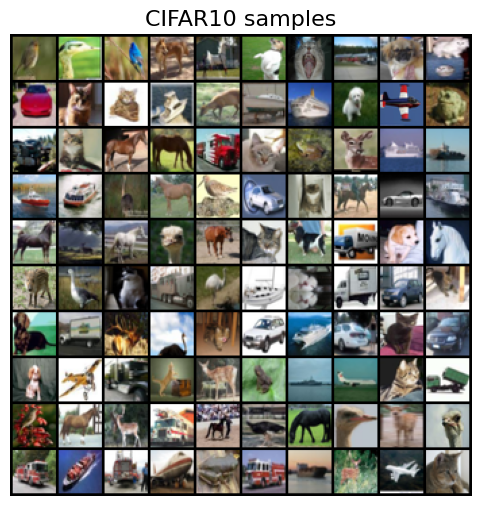

In [4]:
train_data, test_data = load_dataset("cifar10", flatten=False, binarize=False)
visualize_images(train_data, "CIFAR10 samples")

Now it is time to define our model. Our model will have the following structure:

* Prior distribution is standard Normal ($p(\mathbf{z}) = \mathcal{N}(0, I)$).
* Variational posterior distribution (or encoder) is $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$. Here $\boldsymbol{\phi}$ denotes all parameters of the encoder neural network. We will assume that covariance matrice $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$ is diagonal.
* Generative distribution (or decoder) is $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$. Here $\boldsymbol{\theta}$ denotes all parameters of the decoder neural network. Please note, that here we will use continuous distribution for our variables $\mathbf{x}$.
* We do not fit the covariance matrix $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$ in the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. We assume that it is identical ($\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}) = \mathbf{I}$). We will use the $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ (mean of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$) as model samples.
* Our encoder and decoder will be convolutional neural networks.
* Model objective is slightly modified ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - \beta * KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$
Here we introduce the parameter $\beta$. It reweights KL term in the total loss. It a standard heuristics that allows to get more accurate model. In this exercise you have to play with it, starting with the value $\beta = 1$ (standard ELBO).

To make the expectation is independent of parameters $\boldsymbol{\phi}$, we will use reparametrization trick.


To calculate the loss, we should derive
- $\log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$, note that generative distribution is $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$.
- KL between $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$ and $\mathcal{N}(0, \mathbf{I})$.

Let start with the helper functions.

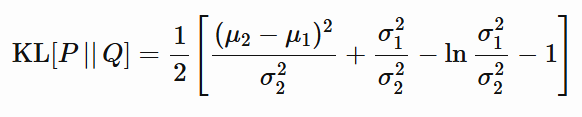

In [5]:
def get_normal_KL(
    mean_1: torch.Tensor,
    log_std_1: torch.Tensor,
    mean_2: Optional[torch.Tensor] = None,
    log_std_2: Optional[torch.Tensor] = None,
) -> torch.Tensor:
    """
    :Parameters:
    mean_1: means of normal distributions (1)
    log_std_1 : standard deviations of normal distributions (1)
    mean_2: means of normal distributions (2)
    log_std_2 : standard deviations of normal distributions (2)
    :Outputs:
    kl divergence of the normal distributions (1) and normal distributions (2)
    ---
    This function should return the value of KL(p1 || p2),
    where p1 = Normal(mean_1, exp(log_std_1) ** 2), p2 = Normal(mean_2, exp(log_std_2) ** 2).
    If mean_2 and log_std_2 are None values, we will use standard normal distribution.
    Note that we consider the case of diagonal covariance matrix.
    """
    if mean_2 is None:
        mean_2 = torch.zeros_like(mean_1)
    if log_std_2 is None:
        log_std_2 = torch.zeros_like(log_std_1)
    assert mean_1.shape == log_std_1.shape == mean_2.shape == log_std_2.shape
    # ====

    term_1 = (mean_2 - mean_1) ** 2 / torch.exp(2 * log_std_2)
    term_2 = torch.exp(2 * (log_std_1 - log_std_2))
    term_3 = 2 * (log_std_1 - log_std_2)

    return 1 / 2 * (term_1 + term_2 - term_3 - 1)
    # ====


def test_KL():
    assert np.isclose(
        get_normal_KL(
            torch.tensor(2), torch.tensor(3), torch.tensor(0), torch.tensor(0)
        ).numpy(),
        200.2144,
        rtol=1e-3,
    )
    assert np.isclose(
        get_normal_KL(
            torch.tensor(2), torch.tensor(3), torch.tensor(4), torch.tensor(5)
        ).numpy(),
        1.50925,
        rtol=1e-3,
    )
    assert np.allclose(
        get_normal_KL(
            torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))
        ).numpy(),
        [49.2990, 1498.479],
        rtol=1e-3,
    )


test_KL()

In [6]:
def get_normal_nll(
    x: torch.Tensor, mean: torch.Tensor, log_std: torch.Tensor
) -> torch.Tensor:
    """
    This function should return the negative log likelihood log p(x),
    where p(x) = Normal(x | mean, exp(log_std) ** 2).
    Note that we consider the case of diagonal covariance matrix.
    """
    # ====
    dist = torch.distributions.Normal(mean, torch.exp(log_std))

    return -dist.log_prob(x)
    # ====


def test_NLL():
    assert np.isclose(
        get_normal_nll(torch.tensor(2), torch.tensor(2), torch.tensor(3)).numpy(),
        3.9189,
        rtol=1e-3,
    )
    assert np.isclose(
        get_normal_nll(torch.tensor(5), torch.tensor(-3), torch.tensor(6)).numpy(),
        6.9191,
        rtol=1e-3,
    )
    assert np.allclose(
        get_normal_nll(
            torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))
        ).numpy(),
        np.array([3.9982, 5.9197]),
        rtol=1e-3,
    )


test_NLL()

Let define our encoder and decoder neural networks. We will use ResNet-like encoder and decoder.

First of all let define basic ResNet block. It will be the basic block for our encoder.

In [7]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, final_relu=True):
        super().__init__()
        self.final_relu = final_relu
        # ====
        # your code
        # here you could try different network structures
        # we suggest to use the following:
        # residual(x) = conv(bn(relu(conv(bn(x)))))
        # output = relu(conv1x1(input) + residual(input))

        self.residual = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding=kernel_size // 2),
            nn.ReLU(),
            nn.BatchNorm2d(out_channels),
            nn.Conv2d(out_channels, out_channels, kernel_size, 1, padding=kernel_size // 2)
            )

        self.relu2  = nn.ReLU()

        self.conv_res = nn.Conv2d(in_channels, out_channels, 1, stride)

        # ====

    def forward(self, x):
        # ====
        result = self.conv_res(x) + self.residual(x)
        # ====
        if self.final_relu:
            result = self.relu2(result)
        return result


def test_resnet_block():
    test_inp = torch.randn(5, 64, 128, 128)

    for out_channels in [64, 128]:
        for kernel_size in [3, 5, 7]:
            for stride in [1, 2, 4]:
                resnet_block = ResNetBlock(in_channels=64, out_channels=out_channels,
                                        kernel_size=kernel_size, stride=stride)
                assert list(resnet_block(test_inp).shape) == [5, out_channels, 128 // stride, 128 // stride]


test_resnet_block()

Now let define basic ResNet block. It will be the basic block for our decoder.

In [8]:
class ResNetTransposeBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, final_relu=True):
        super().__init__()
        self.final_relu = final_relu
        # ====
        # your code
        # here you could try different network structures
        # we suggest to use the following:
        # output = conv(bn(f(input))) + f(input), where:
        # f(x) = upconv(bn(x))

        pad = (kernel_size - stride) // 2
        out_pad = stride - (kernel_size - 2 * pad)

        self.f_layer = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding=pad, output_padding=out_pad)
            )

        self.conv_layer = nn.Sequential(
            nn.BatchNorm2d(out_channels),
            nn.Conv2d(out_channels, out_channels, 1, 1)
            )

        self.relu1  = nn.ReLU()

        # ====

    def forward(self, x):
        # ====
        result_f = self.f_layer(x)
        result = self.conv_layer(result_f) + result_f

        # ====
        if self.final_relu:
            result = self.relu1(result)
        return result


def test_resnet_transposed_block():
    test_inp = torch.randn(5, 64, 64, 64)
    for out_channels in [64, 128]:
        for kernel_size in [4, 6, 8]:
            for stride in [2, 4]:
                resnet_block = ResNetTransposeBlock(
                    in_channels=64, out_channels=out_channels, kernel_size=kernel_size, stride=stride)

                assert list(resnet_block(test_inp).shape) == [5, out_channels, 64 * stride, 64 * stride]


test_resnet_transposed_block()

Now we are to define our encoder and decoder.

In [9]:
class ConvResNetEncoder(nn.Module):
    def __init__(self, input_shape, n_latent):
        super().__init__()
        self.input_shape = input_shape
        self.n_latent = n_latent
        # ====
        # your code
        # our suggestions:
        # - try to combine multiple resnet blocks
        # - place Flatten + Linear at the end

        self.enc_block_1 = ResNetBlock(self.input_shape[0],
                                       self.input_shape[0] * 2,
                                       kernel_size=3,
                                       stride=2)

        self.enc_block_2 = ResNetBlock(self.input_shape[0] * 2,
                                       self.input_shape[0] * 2,
                                       kernel_size=3,
                                       stride=1)

        self.final_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(((self.input_shape[0] * 2)
                       * (input_shape[1] // 2)
                       * (input_shape[2] // 2)), n_latent * 2)
        )

        # ====

    def forward(self, x):
        # ====
        # your code
        # apply all blocks defined in init
        # split output tensor to mu and log_std

        # ====
        out = self.enc_block_1(x)
        out = self.enc_block_2(out)
        mu, log_std = self.final_layers(out).chunk(chunks=2, dim=1)
        return mu, log_std


class ConvResNetDecoder(nn.Module):
    def __init__(self, n_latent, output_shape):
        super().__init__()
        self.n_latent = n_latent
        self.output_shape = output_shape
        # ====
        # your code
        # our suggestions:
        # - apply linear layer to the input
        # - reshape output matrix to 4-dims tensor
        # - try to combine multiple resnet transposed blocks

        # ====
        self.linear_input = nn.Linear(n_latent, self.output_shape[0]
                                                 * self.output_shape[1]
                                                 * self.output_shape[2])

        self.dec_block_1 = ResNetTransposeBlock(self.output_shape[0],
                                                self.output_shape[0])

        self.dec_block_2 = ResNetTransposeBlock(self.output_shape[0],
                                                self.output_shape[0])


    def forward(self, z):
        # ====
        # your code
        # apply all blocks defined in init

        # ====

        out = self.linear_input(z).reshape(-1, *self.output_shape)
        out = self.dec_block_1(out)
        out = self.dec_block_2(out)

        return out


def test_convresnet_models():
    test_enc = ConvResNetEncoder((3, 32, 32), n_latent=10)
    inp = torch.randn((4, 3, 32, 32))
    mu, std = test_enc(inp)

    assert list(mu.shape) == [4, 10]
    assert list(std.shape) == [4, 10]

    test_dec = ConvResNetDecoder(10, (3, 32, 32))
    inp = torch.randn(4, 10)
    assert list(test_dec(inp).shape) == [4, 3, 32, 32]


test_convresnet_models()

We are ready to implement VAE model for image dataset.

In [10]:
class ConvResNetVAE(nn.Module):
    def __init__(self, input_shape: tuple, n_latent: int, beta: float = 1) -> None:
        super().__init__()
        assert len(input_shape) == 3

        self.input_shape = input_shape
        self.n_latent = n_latent
        self.beta = beta

        # ====
        self.encoder = ConvResNetEncoder(self.input_shape, self.n_latent)
        self.decoder = ConvResNetDecoder(self.n_latent, self.input_shape)
        # ====

    @property
    def device(self):
        return next(self.parameters()).device

    def prior(self, n: int) -> torch.Tensor:
        # ====
        # your code
        # return n samples from prior distribution (we use standart normal for prior)

        # ====

        z = torch.randn((n, self.n_latent))
        z = z.to(self.device)
        return z

    def forward(self, x: torch.Tensor) -> tuple:
        # ====
        # your code
        # 1) apply encoder to get mu_z, log_std_z
        # 2) apply reparametrization trick (use self.prior)
        # 3) apply decoder to get mu_x (which corresponds to reconstructed x)

        mu_z, log_std_z = self.encoder(x)
        eps = torch.randn_like(mu_z)
        z = mu_z + torch.exp(log_std_z) * eps
        # z = mu_z + torch.exp(log_std_z) * self.prior(x.shape[0])
        x_recon = self.decoder(z)

        # ====
        return mu_z, log_std_z, x_recon

    def loss(self, x: torch.Tensor) -> dict:
        # ====
        # your code
        # 1) make forward step to get mu_z, log_std_z, x_recon
        # 2) calculate recon_loss (use get_normal_nll)
        # 3) calcucalte kl_loss (use get_normal_KL)

        mu_z, log_std_z, x_recon = self(x)
        recon_loss = get_normal_nll(x, x_recon, torch.zeros_like(x_recon)).sum((1, 2, 3)).mean()
        kl_loss = get_normal_KL(mu_z, log_std_z).sum(1).mean()

        # ====
        return {
            "elbo_loss": recon_loss + self.beta * kl_loss,
            "recon_loss": recon_loss,
            "kl_loss": kl_loss,
        }

    def sample(self, n: int) -> np.ndarray:
        with torch.no_grad():
            # ====
            # your code
            # 1) generate prior samples
            # 2) apply decoder

            # ====
            z = self.prior(n)
            x_recon = self.decoder(z)
            samples = torch.clamp(x_recon, -1, 1)
        return samples.cpu().numpy() * 0.5 + 0.5

That is all! We are ready to train our model.

  0%|          | 0/10 [00:00<?, ?it/s]

elbo_loss: 3102.3916
recon_loss: 3087.5672
kl_loss: 37.0609


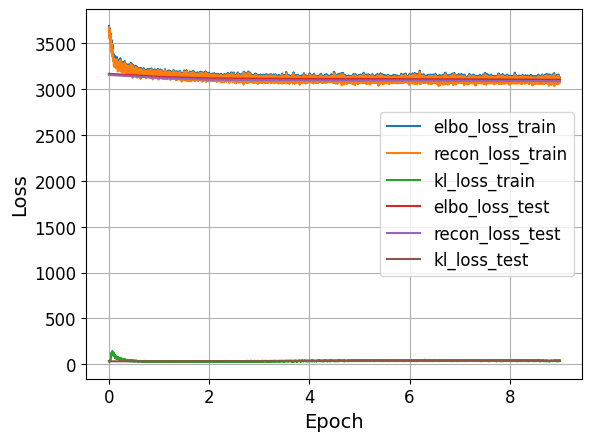

In [ ]:
# ====
# your code
# choose these parameters

BATCH_SIZE = 64  # any adequate value
EPOCHS = 10  # < 16
LR = 1e-4  # < 1e-3
N_LATENS = 512  # 128 < _ < 1024
BETA = 0.4  # 0.1 < _ < 10
# ====

# we center the data, because it helps the model to fit
centered_train_data = train_data * 2 - 1
centered_test_data = test_data * 2 - 1

train_loader = data.DataLoader(centered_train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(centered_test_data, batch_size=BATCH_SIZE)

model = ConvResNetVAE((3, 32, 32), N_LATENS, BETA)

train_losses, test_losses = train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    lr=LR,
    loss_key="elbo_loss",
    use_tqdm=True,
    use_cuda=USE_CUDA,
)
for key, value in test_losses.items():
    print("{}: {:.4f}".format(key, value[-1]))
plot_training_curves(train_losses, test_losses)

Now we could visualize the model outputs.

1. We could sample new images from our model (sample latent variable from the prior and apply the decoder).
2. We could visualize image reconstructions (apply the encoder and the decoder to the fixed image).
3. Visualize interpolations (apply the encoder to two images $\mathbf{x}_1$ and $\mathbf{x}_2$ to obtain the latent variables $\mathbf{z}_1$ and $\mathbf{z}_2$, apply the decoder to the latent variables $\mathbf{z}$ lying on the segment between $\mathbf{z}_1$ and $\mathbf{z}_2$).

**Note:** it is ok that your samples are blurry. We do not use difficult architectures and do not tune hyperparameters carefully.

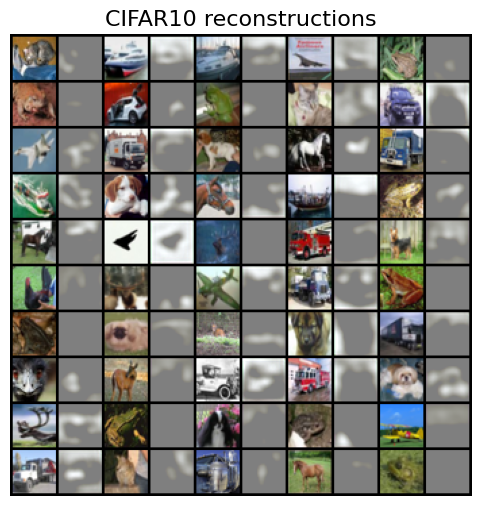

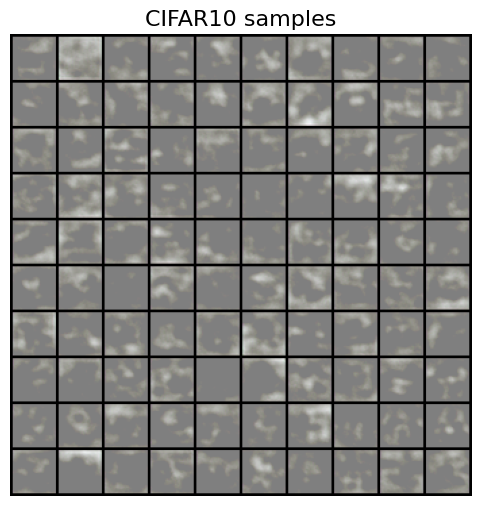

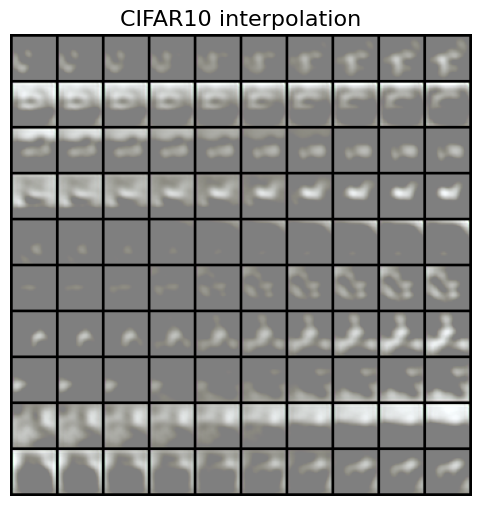

In [ ]:
samples = model.sample(100)

x = next(iter(test_loader))[:50]

x = x.to(model.device)

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z), -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20]
x = x.to(model.device)
with torch.no_grad():
    z, _ = model.encoder(x)
    z1, z2 = z.chunk(2, dim=0)
    interps = [model.decoder(z1 * (1 - alpha) + z2 * alpha) for alpha in np.linspace(0, 1, 10)]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, 'CIFAR10 reconstructions')
show_samples(samples, 'CIFAR10 samples')
show_samples(interps, 'CIFAR10 interpolation')

## Task 3: VQ-VAE on MNIST (5 pt)

### Training of VQ-VAE model

In this part you will train [VQ-VAE](https://arxiv.org/abs/1711.00937) model that we have discussed at the Lecture 6 (see also [VQ-VAE-2](https://arxiv.org/abs/1906.00446) paper).

We will you MNIST dataset in this task.

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.17MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.09MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.60MB/s]


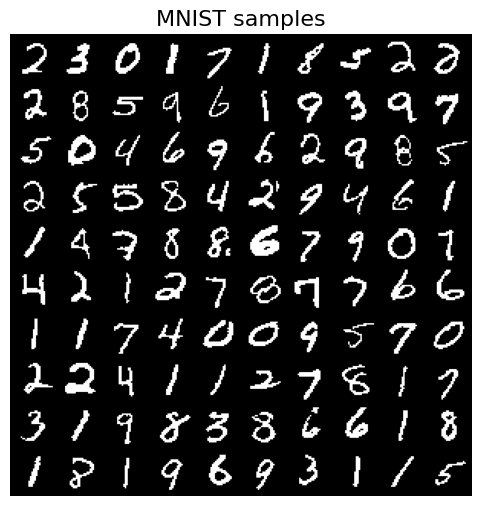

In [11]:
train_data, test_data = load_dataset("mnist", flatten=False, binarize=True)
visualize_images(train_data, "MNIST samples")

VQ-VAE model is a VAE model with discrete latent variable.  

**Reminder:**
* We define  dictionary (word book) space $\{\mathbf{e}_k\}_{k=1}^K$, where $\mathbf{e}_k \in \mathbb{R}^C$, $K$ is the size of the dictionary.
* $\mathbf{z}_e = \text{NN}_e(\mathbf{x}, \boldsymbol{\phi})$ - continuous output of encoder network.
* $\mathbf{z}_q = \mathbf{e}_{k^*}$ is a quantized representation, where $k^* = \text{argmin}_k \| \mathbf{z} - \mathbf{e}_k \|$. It is simple nearest neighbor look up.
* Out deterministic variational posterior:
$$
  q(c = k^* | \mathbf{x}, \boldsymbol{\phi}) = \begin{cases}
  1 , \quad \text{for } k^* = \text{argmin}_k \| \mathbf{z}_e - \mathbf{e}_k \|; \\
  0, \quad \text{otherwise}.
\end{cases}
$$
* Prior distribution is uniform: $p(c) = \text{Uniform}\{1, \dots, K\}$.
* KL divergence between posterior and prior:
$$
  KL(q(c = k^* | \mathbf{x}, \boldsymbol{\phi}), p(c)) = \log K.
$$
* ELBO:
$$
		\mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta})  = \mathbb{E}_{q(c | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{e}_{c} , \boldsymbol{\theta}) - \log K =  \log p(\mathbf{x} | \mathbf{z}_q, \boldsymbol{\theta}) - \log K.
$$
* Vector quantization is non-differentiable operation. We will use **straight-through** gradient estimator (we will copy gradients from decoder input $\mathbf{z}_q$ to encoder output $\mathbf{z}_e$.

**Important modifications:**
Due to the straight-through gradient estimation of mapping from $\mathbf{z}_e$ to $\mathbf{z}_q$, the embeddings $\mathbf{e}$ receive no gradients from the ELBO.

Therefore, in order to learn the embedding space we add l2 loss (**codebook loss**) to move the embedding vectors $\mathbf{e}$ towards the encoder outputs $\mathbf{z}_e$.

Finally, since the volume of the embedding space is dimensionless, it can grow arbitrarily if the embeddings $\mathbf{e}$ do not train as fast as the encoder parameters. To make sure the encoder commits to an embedding and its output does not grow, we add a **commitment loss**.

Thus, the total training objective becomes:
$$
  \log p(\mathbf{x}| \mathbf{z}_q, \boldsymbol{\theta}) + \| \text{stop\_gradient}(\mathbf{z}_e) - \mathbf{e}\|_2^2 + \| \mathbf{z}_e - \text{stop\_gradient}(\mathbf{e})\|_2.
$$

Pay attention to the $\text{stop\_gradient}(*)$ operator.


Our first step is implement vector quantization procedure. It will also calculate two consistency losses.

In [15]:
class VectorQuantizer(nn.Module):
    def __init__(
        self, num_embeddings: int = 128, embedding_dim: int = 16, beta: float = 0.25
    ) -> None:
        super().__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings

        self.beta = beta

        # Initialize the embeddings which we will quantize.
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.embedding.weight.data.uniform_(-1 / num_embeddings, 1 / num_embeddings)

    def get_code_indices(self, x: torch.Tensor) -> torch.Tensor:
        x = x.permute(0, 2, 3, 1).contiguous()
        input_shape = x.shape[:-1]
        flattened = x.view(-1, self.embedding_dim)
        # ====
        # your code
        # 1) calculate distances from flatten inputs to embeddings
        # 2) find nearest embeddings to each input (use argmin op)

        # ====
        dist = torch.cdist(flattened, self.embedding.weight.data, p=2)
        encoding_indices = torch.argmin(dist, dim=1)
        encoding_indices = encoding_indices.view(input_shape)
        return encoding_indices

    def get_quantized(self, encoding_indices: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # 1) get embeddgins with appropriate indices
        # 2) transform tensor from BHWC to BCHW format

        # ====
        quantized = self.embedding(encoding_indices).permute(0, 3, 1, 2).contiguous()
        return quantized

    def forward(self, x: torch.Tensor) -> tuple:
        # ====
        # your code
        # 1) get indices
        # 2) get quantized latents
        # 3) calculate codebook and commitment loss
        #    do not afraid about stop_gradient op
        #    (use .detach() method for quantized latents and x)
        # 4) final loss is codebook_loss + beta * commitment_loss

        # ====

        # Straight-through estimator (think about it!).
        encoding_indices = self.get_code_indices(x)
        quantized = self.get_quantized(encoding_indices)
        quantized = x + (quantized - x).detach()

        codebook_loss   = F.mse_loss(quantized, x.detach(), reduction="mean")
        commitment_loss = F.mse_loss(x, quantized.detach(), reduction="mean")
        loss = codebook_loss + self.beta * commitment_loss

        # loss = ((x.detach() - quantized).pow(2).sum((1, 2, 3)).mean()
        #         + self.beta * (x - quantized.detach()).pow(2).sum((1, 2, 3)).mean())

        return quantized, loss


def test_vector_quantizer():
    x = torch.zeros((1, 16, 7, 7))
    layer = VectorQuantizer()
    indices = layer.get_code_indices(x)
    assert indices.shape == (1, 7, 7)
    quantized = layer.get_quantized(indices)
    assert quantized.shape == (1, 16, 7, 7)
    quantized, loss = layer(x)
    assert quantized.shape == (1, 16, 7, 7)
    assert loss.shape == ()


test_vector_quantizer()

We will use simple encoder/decoder with several strided convolutions.

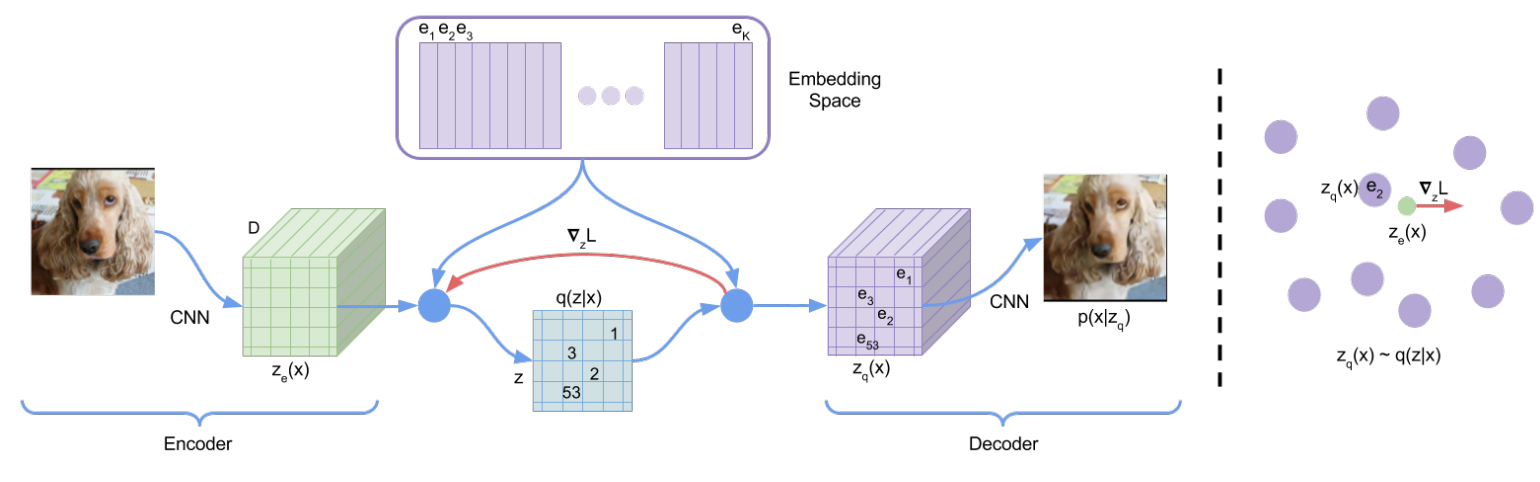

In [20]:
class ConvEncoder(nn.Module):
    def __init__(self, latent_dim: int) -> None:
        super().__init__()
        # ====
        # your code
        # define Sequential model with Conv2d and ReLU activation
        self.net = nn.Sequential(nn.BatchNorm2d(1),
                                 nn.Conv2d(1, latent_dim // 2, 3, 2, padding=3//2),
                                 nn.ReLU(),
                                 nn.BatchNorm2d(latent_dim // 2),
                                 nn.Conv2d(latent_dim // 2, latent_dim, 3, 2, padding=3//2),
                                 nn.ReLU(),
                                 nn.BatchNorm2d(latent_dim),
                                 nn.Conv2d(latent_dim, latent_dim, 1, 1, padding=0)
                                 )
        # ====

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.net(x)


class ConvDecoder(nn.Module):
    def __init__(self, latent_dim: int) -> None:
        super().__init__()
        # ====
        # your code
        # define Sequential model with ConvTransposed2d and ReLU activation

        self.net = nn.Sequential(nn.BatchNorm2d(latent_dim),
                                 nn.ConvTranspose2d(latent_dim, latent_dim // 2, 3, 2, padding=1, output_padding=1),
                                 nn.ReLU(),
                                 nn.BatchNorm2d(latent_dim // 2),
                                 nn.ConvTranspose2d(latent_dim // 2, 2, 3, 2, padding=1, output_padding=1),
                                 nn.ReLU(),
                                #  nn.BatchNorm2d(2),
                                 nn.ConvTranspose2d(2, 2, 1, 1)
                                 )
        # ====

    def forward(self, z: torch.Tensor) -> torch.Tensor:
        return self.net(z)

Now we are ready to define our model. It consists of encoder, decoder and vector quantizer.

In [29]:
class VQVAEModel(nn.Module):
    def __init__(
        self,
        ce_loss_scale: float = 1.0,
        latent_dim: int = 16,
        num_embeddings: int = 64,
        latent_size: tuple = (7, 7),
    ) -> None:
        super().__init__()
        self.encoder = ConvEncoder(latent_dim)
        self.decoder = ConvDecoder(latent_dim)
        self.vq_layer = VectorQuantizer(num_embeddings, latent_dim, beta=4)
        self.ce_loss_scale = ce_loss_scale
        self.latent_size = latent_size

    @property
    def device(self):
        return next(self.parameters()).device

    def forward(self, x: torch.Tensor) -> tuple:
        # ====
        # your code
        # 1) apply encoder
        # 2) apply vector quantizer (it returns quantized representation + vq_loss)
        # 3) apply decoder (it returns decoded samples)

        z_e = self.encoder(x)
        z_q, vq_loss = self.vq_layer(z_e)
        decoded = self.decoder(z_q)
        return decoded, vq_loss

    def loss(self, x: torch.Tensor) -> dict:
        # ====
        # your code
        # 1) apply model
        # 2) get cross entropy loss
        decoded, vq_loss = self(x)
        ce_loss = F.cross_entropy(decoded, x.squeeze().to(dtype=torch.long))
        # ====
        return {
            "total_loss": self.ce_loss_scale * ce_loss + vq_loss,
            "ce_loss": self.ce_loss_scale * ce_loss,
            "vq_loss": vq_loss,
        }

    def get_indices(self, x: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        # 1) apply encoder
        # 2) get indices of codes using vector quantizer

        z_e = self.encoder(x)
        codebook_indices = self.vq_layer.get_code_indices(z_e)
        # ====
        return codebook_indices

    def prior(self, n: int) -> torch.Tensor:
        # ====
        # your code
        # prior distribution is uniform
        # 1) get samples from categorical distribution
        # 2) get quantized representations using vector quantizer

        # ====
        indices = torch.randint(low=0, high=self.vq_layer.num_embeddings, size=(n, *self.latent_size), device=self.device, dtype=torch.long)
        # indices = torch.distributions.Categorical(probs=torch.ones(self.vq_layer.num_embeddings) / self.vq_layer.num_embeddings).sample((n, *self.latent_size))
        quantized = self.vq_layer.get_quantized(indices)
        return quantized

    def sample_from_logits(self, logits: torch.Tensor) -> np.ndarray:
        # ====
        # your code
        # our model will return logits, this method applies softmax and samples from the distribution
        # 1) apply softmax to the logits
        # 2) sample from the distribution (e.x. you could use torch.multinomial)
        # be careful with the sizes of the tensors (may be you need to permute/reshape dimensios)

        # ====
        input_shape = logits.shape
        probs = F.softmax(logits, dim=1).permute(0, 2, 3, 1).reshape(-1, 2)
        samples = torch.multinomial(probs, num_samples=1).reshape(input_shape[0], 1, input_shape[2], input_shape[3])
        return samples.cpu().numpy()

    def sample(self, n: int) -> np.ndarray:
        with torch.no_grad():
            # ====
            # your code
            # 1) sample from prior distribution
            # 2) apply decoder
            # 3) sample from logits

            # ====
            q_sampes = self.prior(n)
            logits   = self.decoder(q_sampes)
            samples  = self.sample_from_logits(logits)
            return samples


def test_vqvae_model():
    model = VQVAEModel().cuda()
    x = torch.zeros((2, 1, 28, 28)).cuda()

    encoded = model.encoder(x)
    size = encoded.shape[2:]
    assert size == model.latent_size

    indices = model.get_indices(x)
    assert indices.shape == (2, 7, 7)

    losses = model.loss(x)
    assert isinstance(losses, dict)
    assert "total_loss" in losses

    quantized = model.prior(10)
    assert quantized.shape == (10, 16, *model.latent_size)

    decoded = model.decoder(quantized)
    assert decoded.shape == (10, 2, 28, 28)

    sampled = model.sample(10)
    assert sampled.shape == (10, 1, 28, 28)


test_vqvae_model()

Let's train our model!

  0%|          | 0/25 [00:00<?, ?it/s]

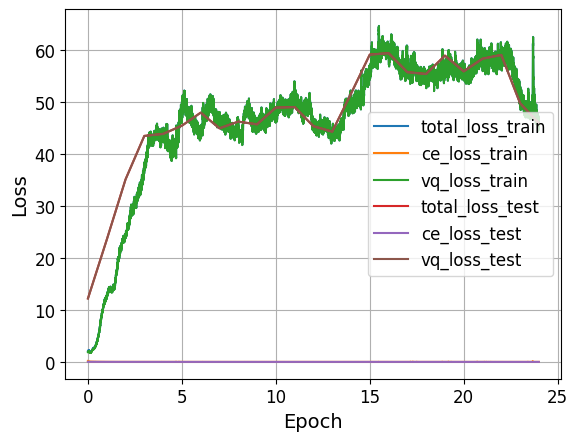

In [41]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 64  # any adequate value
EPOCHS = 25  # < 30
LR = 1e-3  # < 1e-2
CE_SCALE = 0.4  # 0.01 < x < 30.0
# ====

train_data, test_data = load_dataset("mnist", flatten=False, binarize=True)

model = VQVAEModel(ce_loss_scale=CE_SCALE, latent_dim=16, num_embeddings=128)

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)

train_losses, test_losses = train_model(
    model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    use_cuda=USE_CUDA,
    use_tqdm=True,
    lr=LR,
)

plot_training_curves(train_losses, test_losses)

Now we is able to sample from the trained model.

total_loss: 45.9721
ce_loss: 0.0212
vq_loss: 45.9509


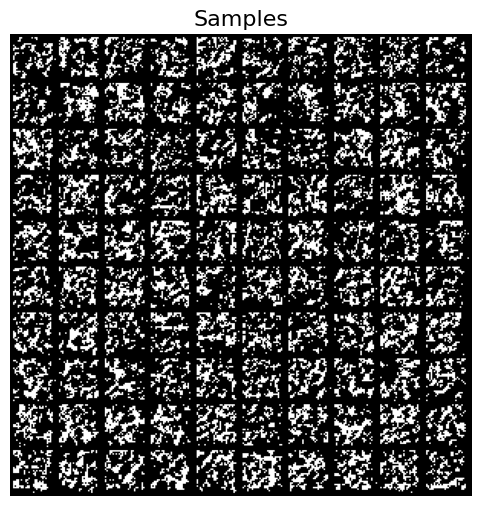

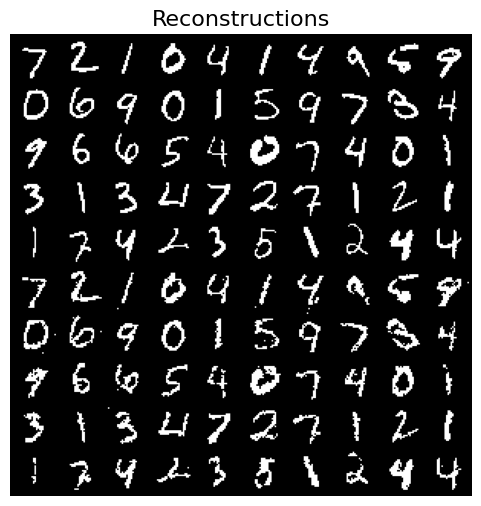

In [42]:
# Test losses
for key, value in test_losses.items():
    print("{}: {:.4f}".format(key, value[-1]))

# Samples
samples = model.sample(100)
samples = samples.astype("float32")
show_samples(samples, title="Samples")

# Reconstructions
x = next(iter(test_loader))[:50].cuda()
with torch.no_grad():
    decoded, _ = model(x)
    x_recon = model.sample_from_logits(decoded)
x = x.cpu().numpy()
reconstructions = np.concatenate((x, x_recon), axis=0)
reconstructions = reconstructions.astype("float32")
show_samples(reconstructions, title="Reconstructions")

Probably you will get bad samples :(

Do not worry, may be it is OK, we will try to fix your samples! Make sure that reconstructions are almost perfect.

Here, we will visualize latent code indices for test images.

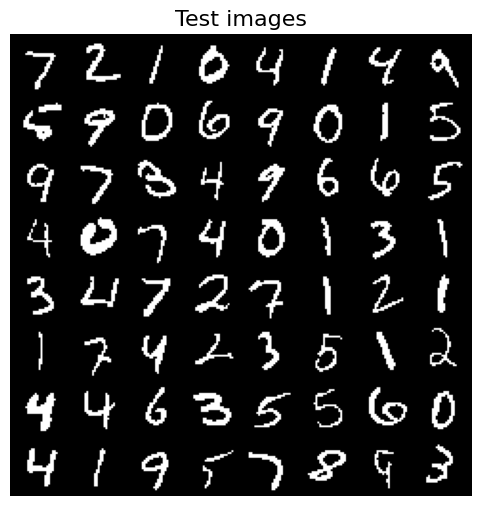

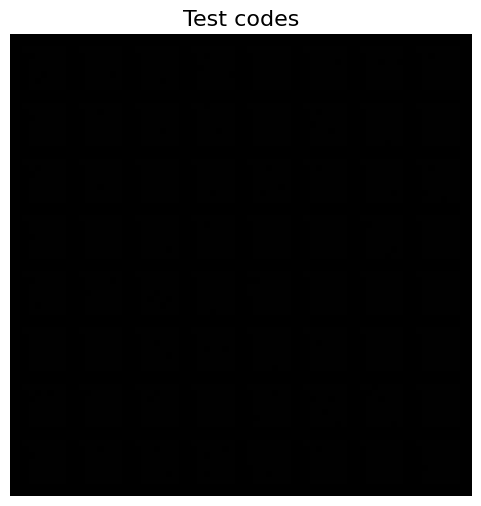

In [56]:
test_images = next(iter(test_loader))[:100]
x = test_images.cuda()
codebook_indices = model.get_indices(x).cpu().unsqueeze(1)

show_samples(test_images, "Test images")
show_samples(codebook_indices, "Test codes")

### Training of prior autoregressive model

The samples from our VQ-VAE model is not good enough. The authors of the original VQ-VAE paper proposed to train autoregressive model in the latent space after we trained VQ-VAE model.

Remember we have discussed **ELBO surgery** and **aggregrated posterior**. Let recall what do we have in VAE:
* **Training:** we get latent variables $\mathbf{z}$ from variational posterior $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$ for every object $\mathbf{x}$ and then applies decoder ($p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$). It means that in average decoder is applied to the latent variables from aggregated posterior $q_{\text{agg}}(\mathbf{z} | \boldsymbol{\phi})$.
* **Inference:** We apply decoder to the latent variables from prior distribution $p(\mathbf{z})$.

It means that if our aggregated posterior $q_{\text{agg}}(\mathbf{z} | \boldsymbol{\phi})$ and prior $p(\mathbf{z})$ is too far from each other, then we get inconsistency.

So let train to remove this inconsistency. To be concrete, let train (autoregressive) model in the latent space that will try to predict samples from the aggregated posterior $q_{\text{agg}}(\mathbf{z} | \boldsymbol{\phi})$.

We will use our good friend: PixelCNN model.

In [33]:
class MaskedConv2d(nn.Conv2d):
    def __init__(
        self, mask_type: str, in_channels: int, out_channels: int, kernel_size: int = 5
    ) -> None:
        assert mask_type in ["A", "B"]
        super().__init__(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            padding=kernel_size // 2,
        )
        self.register_buffer("mask", torch.zeros_like(self.weight))
        self.create_mask(mask_type)

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        # ====
        # your code
        return F.conv2d(input, self.weight * self.mask, self.bias, padding=self.padding)
        # ====

    def create_mask(self, mask_type: str) -> None:
        # ====
        # your code
        # do not forget about mask_type
        k = self.kernel_size[0]
        self.mask[:, :, :k // 2, :] = 1
        self.mask[:, :, k // 2, :k // 2] = 1
        if mask_type == 'B':
            self.mask[:, :, k // 2, k // 2] = 1


def test_masked_conv2d():
    layer = MaskedConv2d("A", 2, 2)
    assert np.allclose(layer.mask[:, :, 2, 2].numpy(), np.zeros((2, 2)))

    layer = MaskedConv2d("B", 2, 2)
    assert np.allclose(layer.mask[:, :, 2, 2].numpy(), np.ones((2, 2)))


test_masked_conv2d()

In [35]:
class LayerNorm(nn.LayerNorm):
    def __init__(self, n_filters: int) -> None:
        super().__init__(n_filters)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.permute(0, 2, 3, 1).contiguous()
        x = super().forward(x)
        return x.permute(0, 3, 1, 2).contiguous()

In [57]:
class PixelCNN(nn.Module):
    def __init__(
        self,
        num_embeddings: int = 128,
        input_shape: tuple = (7, 7),
        n_filters: int = 32,
        kernel_size: int = 5,
        n_layers: int = 5,
    ) -> None:

        super().__init__()
        self.input_shape = input_shape
        self.num_embeddings = num_embeddings

        # ====
        # your code
        # apply the sequence of MaskedConv2d -> ReLU
        # the last layer should be MaskedConv2d (not ReLU)
        # Note 1: the first conv layer should be of type 'A'
        # Note 2: final output_dim in MaskedConv2d must be 2

        # ====

        model = [MaskedConv2d("A", self.num_embeddings, n_filters, kernel_size=kernel_size)]

        for _ in range(n_layers):
            model.extend(
              [
                LayerNorm(n_filters),
                nn.ReLU(),
                MaskedConv2d("B", n_filters, n_filters, kernel_size=kernel_size)
              ]
            )

        model.extend(
            [
                nn.ReLU(),
                MaskedConv2d("B", in_channels=n_filters, out_channels=self.num_embeddings, kernel_size=1),
            ]
        )

        self.net = nn.Sequential(*model)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # read the forward method carefully
        flattened = x.view((-1, 1))
        encodings = torch.zeros(flattened.shape[0], self.num_embeddings).cuda()
        encodings.scatter_(1, flattened, 1)
        encodings = encodings.view((-1, *self.input_shape, self.num_embeddings))
        encodings = encodings.permute((0, 3, 1, 2))
        out = self.net(encodings)
        out = out.view(-1, self.num_embeddings, 1, *self.input_shape)
        return out

    def loss(self, x: torch.Tensor) -> dict:
        # ====
        total_loss = F.cross_entropy(self(x), x.long())
        # ====
        return {"total_loss": total_loss}

    def sample(self, n: int) -> np.ndarray:
        # read carefully the sampling process
        samples = torch.zeros(n, 1, *self.input_shape, dtype=torch.int64).cuda()
        with torch.no_grad():
            for r in range(self.input_shape[0]):
                for c in range(self.input_shape[1]):
                    logits = self(samples)[:, :, :, r, c]
                    probs = F.softmax(logits, dim=1).squeeze(-1)
                    samples[:, 0, r, c] = torch.multinomial(
                        probs, num_samples=1
                    ).squeeze(-1)
        return samples.cpu().numpy()


def test_pixelcnn():
    model = PixelCNN().cuda()
    x = torch.zeros((1, 1, 7, 7), dtype=torch.int64).cuda()
    output = model(x)
    assert output.shape == (1, 128, 1, 7, 7)
    losses = model.loss(x)
    assert isinstance(losses, dict)
    assert "total_loss" in losses
    samples = model.sample(10)
    assert samples.shape == (10, 1, 7, 7)


test_pixelcnn()

Now we need to get our train and test samples. Our model will predict indices of the embeddings.

In [75]:
torch.tensor([[1, 2, 4], [3, 4, 6]]).unsqueeze(1).shape

torch.Size([2, 1, 3])

In [80]:
# ====
# your code
# you have to get indices of the emdeddings from the VQ-VAE model for train and test data
INPUT_SHAPE = (7, 7)  # input shape of your latent space

# ====

train_indices = np.array(model.get_indices(torch.tensor(train_data).cuda()).unsqueeze(1).cpu())
test_indices  = np.array(model.get_indices(torch.tensor(test_data).cuda()).unsqueeze(1).cpu())

assert isinstance(train_indices, np.ndarray)
assert isinstance(test_indices, np.ndarray)
assert train_indices.shape == (60000, 1, *INPUT_SHAPE)
assert test_indices.shape == (10000, 1, *INPUT_SHAPE)

In [81]:
# ====
# your code
# choose these parameters by your own
EPOCHS = 10  # > 5
BATCH_SIZE = 64  # any adequate value
LR = 1e-3  # < 1e-2
N_LAYERS = 6  # < 10
N_FILTERS = 32  # < 128
# ====

prior_model = PixelCNN(
    input_shape=INPUT_SHAPE, n_filters=N_FILTERS, kernel_size=5, n_layers=N_LAYERS
)

train_loader = data.DataLoader(train_indices, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_indices, batch_size=BATCH_SIZE)
train_losses, test_losses = train_model(
    prior_model,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    lr=LR,
    use_tqdm=True,
    use_cuda=USE_CUDA,
)

  0%|          | 0/10 [00:00<?, ?it/s]

Now we are ready to sample from our VQ-VAE model. The difference here that we will sample our embedding indices from the PixelCNN prior model instead of the Uniform prior distribution.

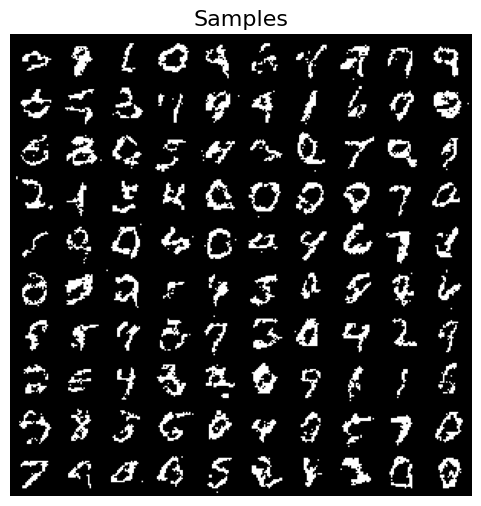

In [82]:
N_SAMPLES = 100
indices = prior_model.sample(N_SAMPLES).squeeze(1)
quantized = model.vq_layer.get_quantized(torch.Tensor(indices).int().cuda())
logits = model.decoder(quantized)
samples = model.sample_from_logits(logits)

samples = samples.astype("float32")
show_samples(samples, title="Samples")

Here you have to get samples with good enough quality!